#Multitaskig framework for cyberbully detection.

In [27]:
from nltk.tokenize import sent_tokenize, word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA

In [28]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier
from numpy import array
from numpy import asarray
from numpy import zeros

In [29]:
import re, string, random
import pickle
from collections import defaultdict
import re
from bs4 import BeautifulSoup
import sys
import emoji, string
import itertools
from nltk.tokenize import sent_tokenize, word_tokenize
import tensorflow_hub as hub

In [30]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding
from sklearn.model_selection import KFold
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPool1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed, concatenate, add
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, precision_recall_fscore_support
from keras.models import Model
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [31]:
# import os, codecs
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [32]:
import tensorflow as tf

# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# config.log_device_placement = True
# tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))


In [33]:
MAX_SENT_LENGTH = 30
MAX_SENTS = 15
MAX_NB_WORDS = 50000
EMBEDDING_DIM = 300
VALIDATION_SPLIT = 0.1
TEST_SPLIT = 0.2

# emoticons
def load_dict_smileys():
    
    return {
":?)":"happy", ":)":"happy", ":-]":"happy", ":]":"happy", ":-3":"happy", ":3":"happy", ":->":"happy", ":>":"happy", "8-)":"happy", "8)":"happy", ":-}":"happy", ":}":"happy", ":o)":"happy", ":c)":"happy", ":^)":"happy", "=]":"happy", "=)":"happy", ":-))":"very happy", ":?D":"laughing", ":D":"laughing", "8?D":"laughing", "8D":"laughing", "x?D":"laughing", "xD":"laughing", "X?D":"laughing", "XD":"laughing", "=D":"laughing", "=3":"laughing", "B^D":"laughing", ":?(":"sad", ":(":"sad", ":?c":"sad", ":c":"sad", ":?<":"sad", ":<":"sad", ":?[":"sad", ":[":"sad", ":-||":"sad", ">:[":"sad", ":{":"sad", ":@":"sad", ">:(":"sad", ":'?(":"crying", ":'(":"crying", ":'?)":"happy", ":')":"happy", "D?':":"disgust", "D:<":"disgust", "D:":"disgust", "D8":"disgust", "D;":"disgust", "D=":"disgust", "DX":"disgust", ":?O":"surprise", ":O":"surprise", ":?o":"surprise", ":o":"surprise", ":-0":"surprise", "8?0":"surprise", ">:O":"surprise", ":-*":"kiss", ":*":"kiss", ":×":"kiss", ";?)":"wink", ";)":"wink", "*-)":"wink", "*)":"wink", ";?]":"wink", ";]":"wink", ";^)":"wink", ":?,":"wink", ";D":"wink", ":?P":"cheeky", ":P":"cheeky", "X?P":"cheeky", "XP":"cheeky", "x?p":"cheeky", "xp":"cheeky", ":?p":"cheeky", ":p":"cheeky", ":?Þ":"cheeky", ":Þ":"cheeky", ":?þ":"cheeky", ":þ":"cheeky", ":?b":"cheeky", ":b":"cheeky", "d:":"cheeky","=p":"cheeky",">:P":"cheeky", ":?/":"annoyed", ":/":"annoyed", ":?.":"annoyed",  ">:/":"annoyed", "=/":"annoyed", ":L":"annoyed", "=L":"annoyed", ":S":"annoyed"
        }

In [34]:
# self-defined contractions
def load_dict_contractions():
    
    return {
        "ain't":"is not", "amn't":"am not", "aren't":"are not", "can't":"cannot",
        "'cause":"because", "couldn't":"could not", "couldn't've":"could not have",
        "could've":"could have", "daren't":"dare not", "daresn't":"dare not", "dasn't":"dare not",
        "didn't":"did not", "doesn't":"does not", "don't":"do not", "e'er":"ever", "em":"them", 
        "everyone's":"everyone is", "finna":"fixing to", "gimme":"give me", "gonna":"going to",
        "gon't":"go not", "gotta":"got to", "hadn't":"had not", "hasn't":"has not", "haven't":"have not",
        "he'd":"he would", "he'll":"he will", "he's":"he is", "he've":"he have", "how'd":"how would", 
        "how'll":"how will", "how're":"how are", "how's":"how is", "i'd":"i would", "i'll":"i will", 
        "i'm":"i am", "i'm'a":"i am about to", "i'm'o":"i am going to", "isn't":"is not", "it'd":"it would", 
        "it'll":"it will", "it's":"it is", "i've":"i have", "kinda":"kind of", "let's":"let us", "mayn't":"may not", 
        "may've":"may have", "mightn't":"might not", "might've":"might have", "mustn't":"must not", 
        "mustn't've":"must not have", "must've":"must have", "needn't":"need not", "ne'er":"never", "o'":"of", 
        "o'er":"over", "ol'":"old", "oughtn't":"ought not", "shalln't":"shall not", "shan't":"shall not", 
        "she'd":"she would", "she'll":"she will", "she's":"she is", "shouldn't":"should not", 
        "shouldn't've":"should not have", "should've":"should havite", "somebody's":"somebody is", 
        "someone's":"someone is", "something's":"something is", "that'd":"that would", "that'll":"that will",
        "that're":"that are", "that's":"that is", "there'd":"there would", "there'll":"there will",
        "there're":"there are", "there's":"there is", "these're":"these are", "they'd":"they would", 
        "they'll":"they will", "they're":"they are", "they've":"they have", "this's":"this is", 
        "those're":"those are", "'tis":"it is", "'twas":"it was", "wanna":"want to", "wasn't":"was not", 
        "we'd":"we would", "we'd've":"we would have", "we'll":"we will", "we're":"we are", "weren't":"were not",
        "we've":"we have", "what'd":"what did", "what'll":"what will", "what're":"what are", "what's":"what is", 
        "what've":"what have", "when's":"when is", "where'd":"where did", "where're":"where are", "where's":"where is", "where've":"where have", "which's":"which is", "who'd":"who would", "who'd've":"who would have", "who'll":"who will", "who're":"who are", "who's":"who is", "who've":"who have", "why'd":"why did", "why're":"why are", "why's":"why is", "won't":"will not", "wouldn't":"would not", "would've":"would have", "y'all":"you all", "you'd":"you would", "you'll":"you will", "you're":"you are", "you've":"you have", "whatcha":"what are you", "luv":"love", "sux":"sucks"
        }
        

In [35]:
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)


In [36]:
#####################################################################################
# DATA CLEANING#
#####################################################################################

def clean_str(string):
    string = string.replace('\n', ' ').replace('\t', ' ')
    string = string.lower()
    string = reduce_lengthening(string)
    
    #CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
    CONTRACTIONS = load_dict_contractions()
#    string = string.replace("â","'").replace("â","'").replace("â","'").replace("â","'").replace("â","'")
    words = string.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    string = " ".join(reformed)

    #Deal with emoticons source: https://en.wikipedia.org/wiki/List_of_emoticons
    SMILEY = load_dict_smileys()  
    words = string.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    string = " ".join(reformed)
    
    #Deal with emojis
    string = emoji.demojize(string)

    string = ' '.join(string.split())

    string = re.sub('[^A-Za-z0-9.?;!]+', ' ', string).lstrip().lower()
    string = string.replace(";"," ; ").replace("."," . ").replace("?"," ? ").replace("!"," ! ")

    string = ' '.join(string.split())    

    return string.strip().lower()

In [37]:
class AttLayer(Layer):
    def __init__(self, attention_dim):
        self.init = initializers.get('normal')
        self.supports_masking = True
        self.attention_dim = attention_dim
        super(AttLayer, self).__init__()
        
    def get_config(self):
        cfg = super().get_config()
        return cfg 

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)))
        self.b = K.variable(self.init((self.attention_dim, )))
        self.u = K.variable(self.init((self.attention_dim, 1)))
        self.trainable_weights_ = [self.W, self.b, self.u]
        super(AttLayer, self).build(input_shape)

    def compute_mask(self, inputs, mask=None):
        return None

    def call(self, x, mask=None):
        # size of x :[batch_size, sel_len, attention_dim]
        # size of u :[batch_size, attention_dim]
        # uit = tanh(xW+b)
        uit = K.tanh(K.bias_add(K.dot(x, self.W), self.b))
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)
        
        ait = K.exp(ait)

        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            ait *= K.cast(mask, K.floatx())
        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = x * ait
        output = K.sum(weighted_input, axis=1)

        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])



In [38]:
data_train = pd.read_csv('Final_code_mixed_multitasking_dataset_6084.csv', sep=',')
print('\nTrain Data Shape:', data_train.shape)
print('\nTrain Data Samples (first 5 rows):\n',data_train.head())


Train Data Shape: (6084, 5)

Train Data Samples (first 5 rows):
                                               Tweets  \
0      Teri maa ki chut me Shivsena ka lund gaya kya   
1  Han muje pata hai teri maa ka ke gufa me jati thi   
2  Tum kaha se aa gye bhai tumlog toh saree pehen...   
3  Koi moti🙊kisi ki besti😁 baisn ka or channey ki...   
4     Rahul kanwal aaj nanga hoke road per nachega 😂   

                                    Processed_Tweets  Bully_Label  \
0      Teri maa ki chut me Shivsena ka lund gaya kya            1   
1  Han muje pata hai teri maa ka ke gufa me jati thi            1   
2  Tum kaha se aa gye bhai tumlog toh saree pehen...            0   
3  Koi motikisi ki besti baisn ka or channey ki d...            1   
4       Rahul kanwal aaj nanga hoke road per nachega            1   

  Sentiment_label Emotion_label  
0        Negative         Anger  
1        Negative        Others  
2         Neutral        Others  
3        Negative       Disgust  
4        Neg

In [39]:
# data_train['Processed_Tweets'] = data_train['Processed_Tweets'].astype(str)   # converting dtype to string
# data_train = data_train[data_train['Processed_Tweets'] != 'nan']           # removing blank rows
# data_train = data_train.reset_index(drop=True)                  # resetting index
# print('Shape after deleting NaN values in text column: ',data_train.shape)
# data_train.head()

In [40]:
#data_train.to_csv( "Final_code_mixed_multitasking_dataset_6084.csv", index=False, encoding='utf8')

1    3050
0    3034
Name: Bully_Label, dtype: int64


/DATA/krishanu_2021cs19/anaconda3/envs/character-bert/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


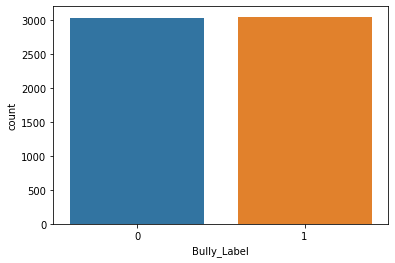

In [41]:
target_count = data_train.Bully_Label.value_counts()
print(target_count)
import seaborn as sns
ax=sns.countplot(data_train.Bully_Label)

Negative    3221
Positive    1536
Neutral     1327
Name: Sentiment_label, dtype: int64


/DATA/krishanu_2021cs19/anaconda3/envs/character-bert/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


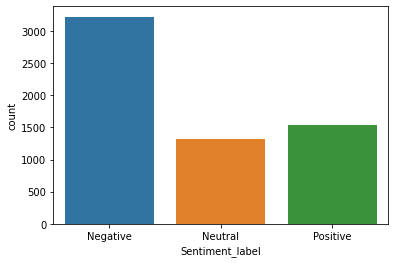

In [42]:
target_count = data_train.Sentiment_label.value_counts()
print(target_count)
ax=sns.countplot(data_train.Sentiment_label)

In [43]:
# target_count = data_train.Emotion_label.value_counts()
# print(target_count)
# ax=sns.countplot(data_train.Emotion_label)

In [44]:
bully_labels = []
sent_labels = []

texts = []

for idx in range(data_train.shape[0]):
    text = clean_str(data_train.Processed_Tweets[idx])
    texts.append(text)
    bully_labels.append(data_train.Bully_Label[idx])
    sent_labels.append(data_train.Sentiment_label[idx])
#    emo_labels.append(data_train.emo1[idx]) 

In [45]:
len(texts)

6084

In [46]:
# tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
# tokenizer.fit_on_texts(texts)

# data = np.zeros((len(texts), MAX_SENT_LENGTH), dtype='int32')

# for i, sent in enumerate(texts):
#     wordTokens = text_to_word_sequence(sent)
#     k = 0
#     for _, word in enumerate(wordTokens):
#         if k < MAX_SENT_LENGTH and tokenizer.word_index[word] < MAX_NB_WORDS:
#             data[i, k] = tokenizer.word_index[word]
#             k = k + 1

# word_index = tokenizer.word_index
# print('\nTotal %s unique tokens.' % len(word_index))
# vocab_size = len(word_index)

In [47]:
# y = ["A","B","D","A","C"]

#print(com_labels[:5])
#print(sent_labels[:5])

le = LabelEncoder()
bully_labels_temp = le.fit_transform(bully_labels)
sent_labels_temp = le.fit_transform(sent_labels)

#print(com_labels_temp[:5])
#print(sent_labels_temp[:5])

bully_labels = to_categorical(np.asarray(bully_labels_temp))
sent_labels = to_categorical(np.asarray(sent_labels_temp))

#print(com_labels[:5])
#print(sent_labels[:5])

#print('\nShape of data tensor:', data.shape)
print('Shape of label tensor:', bully_labels.shape)
print('Shape of label tensor:', sent_labels.shape)

Shape of label tensor: (6084, 2)
Shape of label tensor: (6084, 3)


In [48]:
#bully_labels[2012]

In [49]:
def get_model(model_url, max_seq_length):
     inputs = dict(
     input_word_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32),
     input_mask=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32),
     input_type_ids=tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32),
  )
     
       # Define muril layer.
     muril_layer = hub.KerasLayer(model_url, trainable=False)
     outputs = muril_layer(inputs)
     assert 'pooled_output' in outputs
     assert 'sequence_output' in outputs
     sequence_output=outputs["sequence_output"]
     pooled_output=outputs["pooled_output"]
     #pooled_output, sequence_output = muril_layer([input_word_ids, input_mask, input_type_ids])
     #clf_output = sequence_output[:, 0, :]
     clf_output = pooled_output
 
     return tf.keras.Model(inputs=inputs,outputs=outputs["sequence_output"]), muril_layer
     #return model, muril_layer

In [50]:
os.environ["TFHUB_CACHE_DIR"] = '/tmp/tfhub'

#url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3"
url = "https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3"
#url = "https://tfhub.dev/google/MuRIL/1"
max_seq_length = 30
bert_model, bert_layer = get_model(
    model_url= url, max_seq_length=max_seq_length)

In [51]:
#from bert import bert_tokenization
import tokenization as bert_tokenization
#import bert_tokenizer as tokenizer
import numpy as np

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = bert_tokenization.FullTokenizer(vocab_file, do_lower_case)
 
def create_input(input_strings, tokenizer, max_seq_length):
    input_ids_all, input_mask_all, input_type_ids_all = [], [], []
    for input_string in input_strings:
        # Tokenize input.
        input_tokens = ["[CLS]"] + tokenizer.tokenize(input_string) + ["[SEP]"]
        input_ids = tokenizer.convert_tokens_to_ids(input_tokens)
        sequence_length = min(len(input_ids), max_seq_length)
        # Padding or truncation.
        if len(input_ids) >= max_seq_length:
          input_ids = input_ids[:max_seq_length]
        else:
          input_ids = input_ids + [0] * (max_seq_length - len(input_ids))

        input_mask = [1] * sequence_length + [0] * (max_seq_length - sequence_length)

        input_ids_all.append(input_ids)
        input_mask_all.append(input_mask)
        input_type_ids_all.append([0] * max_seq_length)
    return np.array(input_ids_all), np.array(input_mask_all), np.array(input_type_ids_all)


<AxesSubplot:>

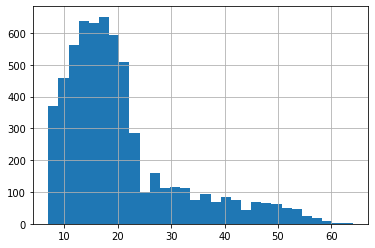

In [52]:
# get length of all the messages in the train set
data_input = data_train.Processed_Tweets.values
seq_len = [len(i.split()) for i in data_input]
pd.Series(seq_len).hist(bins = 30)

In [53]:
# train_input = train.tweets.values
# test_input = test.tweets.values




def encode(input_text):
  input_ids, input_mask, input_type_ids = create_input(
    input_text, tokenizer, max_seq_length)

  inputs = dict(
      input_word_ids=input_ids,
      input_mask=input_mask,
      input_type_ids=input_type_ids,
  )
  return bert_model(inputs)

In [54]:
bert_embedding = encode(data_input)
bert_embedding = np.array(bert_embedding)

In [55]:
bert_embedding.shape

(6084, 30, 768)

In [56]:
#loc = "/DATA/krishanu_2021cs19/krishanu/nlp/Hindi_English/bilingual_embedding/Hin_Eng_align_RCSLS.txt"
#loc = "Paper_Mikel Artetxe_Hindi_English_align_supervised.txt"
#loc = "VecMap_Mikel Artetxe_cc_fasttext_supervised_Hindi_English_align.txt"
loc = "/DATA/krishanu_2021cs19/krishanu/nlp/Hindi_English/bilingual_embedding/cc.en.300.bin"

from gensim.models.wrappers import FastText
from gensim.models import KeyedVectors
#model = KeyedVectors.load_word2vec_format(loc, binary=False)
from gensim.models.wrappers import FastText

model = FastText.load_fasttext_format(loc)


def get_embedding(word):
    try:
        embedding=model[word]
    except:
        embedding=np.zeros((300,))
    return embedding

In [57]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [58]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [59]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [60]:
fasttext_data = []
sentences = list(data_train['Processed_Tweets'])
for sen in sentences:
    fasttext_data.append(preprocess_text(sen))

In [61]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(fasttext_data)

fasttext_data = tokenizer.texts_to_sequences(fasttext_data)

In [62]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

max_seq_length = 30

data = pad_sequences(fasttext_data, padding='post', maxlen=max_seq_length)

In [63]:
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = get_embedding(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [64]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30742946, -0.13690184, -0.08283623, ...,  0.19273479,
         0.07009145, -0.0960138 ],
       [ 0.31369653, -0.49157545, -0.17089289, ...,  0.26439786,
         0.11730152, -0.0206224 ],
       ...,
       [-0.00233691,  0.06894267, -0.02361051, ...,  0.03323715,
         0.01070295, -0.02110484],
       [-0.01463445,  0.01955869,  0.02289837, ...,  0.01524878,
         0.02659323, -0.01037289],
       [ 0.00698292,  0.00891201,  0.00431045, ...,  0.0009022 ,
         0.00989158,  0.01317511]])

In [65]:
print("\nLoading ISACORE model, this can take some time...\n...")
embeddings_index = {}
f = open('isacore.csv', encoding='utf-8')
#f = open('word2vec_cdotdata.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype='float')
        embeddings_index[word] = coefs
    except ValueError:
        continue
f.close()
print("Completed loading pretrained models.")

print('\nTotal %s word vectors.' % len(embeddings_index))


Loading ISACORE model, this can take some time...
...
Completed loading pretrained models.

Total 23207 word vectors.


In [66]:
# building Hierachical Attention network
embedding_matrix1 = np.random.random((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix1[i] = embedding_vector

In [67]:
print("\nLoading Affective Space model, this can take some time...\n...")
embeddings_index = {}
f = open('affectivespace.csv', encoding='utf-8')
#f = open('word2vec_cdotdata.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    try:
        coefs = np.asarray(values[1:], dtype='float')
        embeddings_index[word] = coefs
    except ValueError:
        continue
f.close()
print("Completed loading pretrained models.")

print('\nTotal %s word vectors.' % len(embeddings_index))


Loading Affective Space model, this can take some time...
...
Completed loading pretrained models.

Total 100000 word vectors.


In [68]:
# building Hierachical Attention network
embedding_matrix2 = np.random.random((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix2[i] = embedding_vector 

In [69]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip

In [70]:
# import zipfile
# zip_ref = zipfile.ZipFile('glove.6B.zip', 'r')
# zip_ref.extractall()
# zip_ref.close()

In [71]:
# #Load pre-trained GloVe Embeddings
# print("\nLoading GloVe model, this can take some time...\n...")
# embeddings_index = {}

# f = open('glove.6B.300d.txt', encoding='utf-8')
# for line in f:
#     values = line.split()
#     word = values[0]
#     try:
#         coefs = np.asarray(values[1:], dtype='float')
#         embeddings_index[word] = coefs
#     except ValueError:
#         continue
# f.close()

# print("Completed loading pretrained models.")

# print('\nTotal %s word vectors.' % len(embeddings_index))

# #Create Embedding matrix
# embedding_matrix = np.random.random((len(word_index) + 1, 300))
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         # words not found in embedding index will be all-zeros.
#         embedding_matrix[i] = embedding_vector

In [85]:
#Open a file in write mode to store the results
h = open('results/final_results/1_channel2_VecMap_MT_senti_cv_10.txt', 'w')

#Classes for the three tasks (Depression task, Sentiment task and Emotion task)
target_names_bully = ['non-bully', 'bully']
target_names_sent = ['neg', 'neu', 'pos']
#target_names_emo = ['for', 'happ', 'hopf', 'love', 'pride', 'thank', 'abuse', 'anger', 'blame', 'fear' , 'guilt', 'hopl', 'sorr', 'inf', 'ins']

X = data
y_bully = bully_labels
y_sent = sent_labels
#y_emo = emo_labels

kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvAccscores_bully = []
cvAccscores_sent = []
cvf1score_bully = []
cvf1scores_sent = []
#cvscores_emo = []
prf = []
v=1


In [83]:
embedding_matrix.shape

(20480, 300)

In [84]:
for train, test in kfold.split(X, bully_labels_temp):
	print('\nCV Fold {} :\n'.format(v), file=h)
	v += 1

	embedding_layer = Embedding(vocab_size,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SENT_LENGTH,
                            trainable=False,
                            mask_zero=True)       

# 	embedding_layer1 = Embedding(vocab_size,
#                             100,
#                             weights=[embedding_matrix1],
#                             input_length=MAX_SENT_LENGTH,
#                             trainable=False,
#                             mask_zero=True)

# 	embedding_layer2 = Embedding(vocab_size,
#                             100,
#                             weights=[embedding_matrix2],
#                             input_length=MAX_SENT_LENGTH,
#                             trainable=False,
#                             mask_zero=True)                                                        

                                                        

	vecmap_input = Input(shape=(MAX_SENT_LENGTH,), dtype='int32')
	embedded_sequences = embedding_layer(vecmap_input)	
	l_gru = Bidirectional(GRU(256, return_sequences=True))(embedded_sequences)
	l_att = AttLayer(100)(l_gru)
	l_att_sent1 = Dropout(0.25)(l_att)

	bert_input = Input(shape=(max_seq_length,768))
	l_gru1 = Bidirectional(GRU(256, return_sequences=True))(bert_input)
	l_att_sent2 = AttLayer(100)(l_gru1)
	l_att_sent2 = Dropout(0.25)(l_att_sent2)
	
# 	embedded_sequences2 = embedding_layer2(sentence_input)
# 	l_gru2 = Bidirectional(GRU(256, return_sequences=True))(embedded_sequences2)
# 	l_att_sent3 = AttLayer(100)(l_gru2)
# 	l_att_sent3 = Dropout(0.25)(l_att_sent3)	

#	l_att_sent = concatenate([l_att_sent1, l_att_sent2], axis=-1)



# 	out_bully = Dense(100, activation='relu')(l_att_sent)
# 	out_bully = Dropout(0.25)(out_bully)	
# 	out_bully = Dense(2, activation='softmax', name='out_bully')(out_bully)

	out_sent = Dense(100, activation='relu')(l_att_sent1)
	out_sent = Dropout(0.25)(out_sent)
	out_sent = Dense(50, activation='relu')(out_sent)
	out_sent = Dropout(0.25)(out_sent)
	out_sent = Dense(3, activation='softmax', name='out_sent')(out_sent)
    
	out_bully = Dense(100, activation='relu')(concatenate([l_att_sent1, out_sent], axis=-1))
	out_bully = Dropout(0.25)(out_bully)	
	out_bully = Dense(50, activation='relu')(out_bully)
	out_bully = Dropout(0.25)(out_bully)
	out_bully = Dense(2, activation='softmax', name='out_bully')(out_bully)
    
    
#	#out_emo = Dense(300, activation='relu')(concatenate([l_att_sent1, out_com1, out_sent1], axis=-1))
#	out_emo = Dense(300, activation='relu')(l_att)
#	out_emo = Dropout(0.25)(out_emo)	
#	out_emo = Dense(15, activation='softmax', name='out_emo')(out_emo)
        
	model = Model(inputs=[bert_input, vecmap_input] , outputs = [out_bully, out_sent])
	model.compile(optimizer='adam', 
                   loss = {'out_bully':'categorical_crossentropy','out_sent':'categorical_crossentropy'},
                   loss_weights = [1, 0.2],
                   metrics = {'out_bully':'accuracy', 'out_sent':'accuracy'})

	weight_file = 'weights/mtl_com_sent_cv_' + str(v) + '_1_0.1_64_15_vader.hdf5'
	callback = [ModelCheckpoint(weight_file, monitor='val_out_com_acc', verbose=1, save_best_only=True, mode='max')]
	
	K.set_value(model.optimizer.lr, 1e-3)
	model.fit([bert_embedding[train], X[train]], [y_bully[train], y_sent[train]], batch_size=64, epochs=12, shuffle=True, validation_split=0.1, verbose=1, callbacks=callback)
	#model.load_weights(weight_file)
	#model.save('models/mtl_com_sent_cv_' + str(v) + '_1_0.1_64_15_vader.h5')


#Bully Metrics
	scores = model.evaluate([bert_embedding[test], X[test]], [y_bully[test], y_sent[test]] )
	print("\n%s: %.2f%%" % (model.metrics_names[3], scores[3]*100), file=h)
	#print(model.metrics_names, scores, file=h)
	cvAccscores_bully.append(scores[3] * 100)
	a = model.predict([bert_embedding[test], X[test]])
	a = a[0]
	pred1_test = np.argmax(a, axis=1)
	classes_test = np.argmax(to_categorical(y_bully[test]), axis=1)[:,1]
	predictions1_test=np.array(list(pred1_test))
	print('Classificaton Report of LSTM:\n',classification_report(classes_test, predictions1_test, target_names=target_names_bully), file=h)
	print('Classificaton Report of LSTM:\n',classification_report(classes_test, predictions1_test, target_names=target_names_bully))
	cm1 = confusion_matrix(classes_test, predictions1_test)
	print('Confusion matrix of LSTM:\n', cm1, file=h)
	print('Confusion matrix of LSTM:\n', cm1)
	precision = precision_score(classes_test, predictions1_test)
	print('Precision: %f' % precision, file=h)
    # recall: tp / (tp + fn)
	recall = recall_score(classes_test, predictions1_test)
	print('Recall: %f' % recall, file=h)
    # f1: 2 tp / (2 tp + fp + fn)
	f1 = f1_score(classes_test, predictions1_test)
	print('F1 score: %f' % f1, file=h)
	cvf1score_bully.append(f1 * 100)
	print('~~~~~~~~~~~LSTM Bully~~~~~~~~~~~~\n', file=h)
	print('Accuracy over 10-folds:', cvAccscores_bully, file=h)
	print("Avg. acc.: %.2f%% (Avg. S.D.: +/- %.2f%%)" % (np.mean(cvAccscores_bully), np.std(cvAccscores_bully)), file=h)
	print('F1-score over 10-folds:', cvf1score_bully, file=h)
	print("Avg. acc.: %.2f%% (Avg. S.D.: +/- %.2f%%)" % (np.mean(cvf1score_bully), np.std(cvf1score_bully)), file=h)


#Sentiment Metrics
	scores = model.evaluate([bert_embedding[test], X[test]], [y_bully[test], y_sent[test]])
	print("\n%s: %.2f%%" % (model.metrics_names[4], scores[4]*100), file=h)
	#print(model.metrics_names, scores, file=h)	
	cvAccscores_sent.append(scores[4] * 100)
	a = model.predict([bert_embedding[test], X[test]])
	a = a[1]
	pred1_test = np.argmax(a, axis=1)
	classes_test = np.argmax(to_categorical(y_sent[test]), axis=1)[:,1]
	predictions1_test=np.array(list(pred1_test))
	print('Classificaton Report of LSTM:\n',classification_report(classes_test, predictions1_test, target_names=target_names_sent), file=h)
	print('Classificaton Report of LSTM:\n',classification_report(classes_test, predictions1_test, target_names=target_names_sent))
	cm1 = confusion_matrix(classes_test, predictions1_test)
	print('Confusion matrix of LSTM:\n', cm1, file=h)
	print('Confusion matrix of LSTM:\n', cm1)
	precision = precision_score(classes_test, predictions1_test, average='weighted')
	print('Precision: %f' % precision, file=h)
    # recall: tp / (tp + fn)
	recall = recall_score(classes_test, predictions1_test, average='weighted')
	print('Recall: %f' % recall, file=h)
    # f1: 2 tp / (2 tp + fp + fn)
	f1 = f1_score(classes_test, predictions1_test, average='weighted')
	print('F1 score: %f' % f1, file=h)
	cvf1scores_sent.append(f1 * 100)
	print('~~~~~~~~~~~LSTM Sentiment~~~~~~~~~~~~\n', file=h)
	print('Accuracy over 10-folds:', cvAccscores_sent, file=h)
	print("Avg. acc.: %.2f%% (Avg. S.D.: +/- %.2f%%)" % (np.mean(cvAccscores_sent), np.std(cvAccscores_sent)), file=h)
	print('Accuracy over 10-folds:', cvf1scores_sent, file=h)
	print("Avg. acc.: %.2f%% (Avg. S.D.: +/- %.2f%%)" % (np.mean(cvf1scores_sent), np.std(cvf1scores_sent)), file=h)


Epoch 1/12
77/77 [==============================] - 14s 100ms/step - loss: 0.8299 - out_bully_loss: 0.6376 - out_sent_loss: 0.9614 - out_bully_accuracy: 0.6273 - out_sent_accuracy: 0.5348 - val_loss: 0.5860 - val_out_bully_loss: 0.4495 - val_out_sent_loss: 0.6824 - val_out_bully_accuracy: 0.7883 - val_out_sent_accuracy: 0.7263


Epoch 2/12
77/77 [==============================] - 6s 73ms/step - loss: 0.6253 - out_bully_loss: 0.4791 - out_sent_loss: 0.7309 - out_bully_accuracy: 0.7758 - out_sent_accuracy: 0.6980 - val_loss: 0.4891 - val_out_bully_loss: 0.3755 - val_out_sent_loss: 0.5677 - val_out_bully_accuracy: 0.8175 - val_out_sent_accuracy: 0.7719


Epoch 3/12
77/77 [==============================] - 6s 73ms/step - loss: 0.5418 - out_bully_loss: 0.4187 - out_sent_loss: 0.6158 - out_bully_accuracy: 0.8104 - out_sent_accuracy: 0.7519 - val_loss: 0.4756 - val_out_bully_loss: 0.3650 - val_out_sent_loss: 0.5530 - val_out_bully_accuracy: 0.8175 - val_out_sent_accuracy: 0.7774


Epoch 4/12
77/77 [==============================] - 6s 72ms/step - loss: 0.4794 - out_bully_loss: 0.3648 - out_sent_loss: 0.5729 - out_bully_accuracy: 0.8325 - out_sent_accuracy: 0.7768 - val_loss: 0.4691 - val_out_bully_loss: 0.3637 - val_out_sent_loss: 0.5269 - val_out_bully_accuracy: 0.8303 - val_out_sent_accuracy: 0.8011


Epoch 5/12
77/77 [==============================] - 6s 73ms/step - loss: 0.4757 - out_bully_loss: 0.3653 - out_sent_loss: 0.5523 - out_bully_accuracy: 0.8300 - out_sent_accuracy: 0.7815 - val_loss: 0.4635 - val_out_bully_loss: 0.3615 - val_out_sent_loss: 0.5104 - val_out_bully_accuracy: 0.8321 - val_out_sent_accuracy: 0.7938


Epoch 6/12
77/77 [==============================] - 6s 72ms/step - loss: 0.4280 - out_bully_loss: 0.3263 - out_sent_loss: 0.5087 - out_bully_accuracy: 0.8559 - out_sent_accuracy: 0.8026 - val_loss: 0.4893 - val_out_bully_loss: 0.3851 - val_out_sent_loss: 0.5212 - val_out_bully_accuracy: 0.8248 - val_out_sent_accuracy: 0.7974


Epoch 7/12
77/77 [==============================] - 6s 72ms/step - loss: 0.3915 - out_bully_loss: 0.2935 - out_sent_loss: 0.4901 - out_bully_accuracy: 0.8722 - out_sent_accuracy: 0.8152 - val_loss: 0.4807 - val_out_bully_loss: 0.3747 - val_out_sent_loss: 0.5302 - val_out_bully_accuracy: 0.8193 - val_out_sent_accuracy: 0.7828


Epoch 8/12
77/77 [==============================] - 6s 72ms/step - loss: 0.3475 - out_bully_loss: 0.2533 - out_sent_loss: 0.4708 - out_bully_accuracy: 0.8893 - out_sent_accuracy: 0.8163 - val_loss: 0.5181 - val_out_bully_loss: 0.4072 - val_out_sent_loss: 0.5546 - val_out_bully_accuracy: 0.8285 - val_out_sent_accuracy: 0.7847


Epoch 9/12
77/77 [==============================] - 6s 72ms/step - loss: 0.3229 - out_bully_loss: 0.2361 - out_sent_loss: 0.4342 - out_bully_accuracy: 0.8990 - out_sent_accuracy: 0.8356 - val_loss: 0.5147 - val_out_bully_loss: 0.4040 - val_out_sent_loss: 0.5536 - val_out_bully_accuracy: 0.8285 - val_out_sent_accuracy: 0.7792


Epoch 10/12
77/77 [==============================] - 6s 72ms/step - loss: 0.2934 - out_bully_loss: 0.2067 - out_sent_loss: 0.4333 - out_bully_accuracy: 0.9109 - out_sent_accuracy: 0.8399 - val_loss: 0.6172 - val_out_bully_loss: 0.5032 - val_out_sent_loss: 0.5701 - val_out_bully_accuracy: 0.8230 - val_out_sent_accuracy: 0.7847


Epoch 11/12
77/77 [==============================] - 6s 73ms/step - loss: 0.2599 - out_bully_loss: 0.1816 - out_sent_loss: 0.3916 - out_bully_accuracy: 0.9246 - out_sent_accuracy: 0.8559 - val_loss: 0.6118 - val_out_bully_loss: 0.4896 - val_out_sent_loss: 0.6111 - val_out_bully_accuracy: 0.8230 - val_out_sent_accuracy: 0.7682


Epoch 12/12
77/77 [==============================] - 6s 72ms/step - loss: 0.2359 - out_bully_loss: 0.1593 - out_sent_loss: 0.3826 - out_bully_accuracy: 0.9320 - out_sent_accuracy: 0.8544 - val_loss: 0.6200 - val_out_bully_loss: 0.5017 - val_out_sent_loss: 0.5915 - val_out_bully_accuracy: 0.7974 - val_out_sent_accuracy: 0.7664


20/20 [==============================] - 0s 20ms/step - loss: 0.6692 - out_bully_loss: 0.5313 - out_sent_loss: 0.6894 - out_bully_accuracy: 0.7767 - out_sent_accuracy: 0.7274
Classificaton Report of LSTM:
               precision    recall  f1-score   support

   non-bully       0.74      0.86      0.79       304
       bully       0.83      0.70      0.76       305

    accuracy                           0.78       609
   macro avg       0.78      0.78      0.78       609
weighted avg       0.78      0.78      0.78       609

Confusion matrix of LSTM:
 [[260  44]
 [ 92 213]]
20/20 [==============================] - 0s 20ms/step - loss: 0.6692 - out_bully_loss: 0.5313 - out_sent_loss: 0.6894 - out_bully_accuracy: 0.7767 - out_sent_accuracy: 0.7274
Classificaton Report of LSTM:
               precision    recall  f1-score   support

         neg       0.82      0.77      0.79       317
         neu       0.48      0.63      0.54       134
         pos       0.85      0.73      0.78     

Epoch 2/12
77/77 [==============================] - 6s 72ms/step - loss: 0.6049 - out_bully_loss: 0.4667 - out_sent_loss: 0.6909 - out_bully_accuracy: 0.7694 - out_sent_accuracy: 0.7097 - val_loss: 0.5785 - val_out_bully_loss: 0.4549 - val_out_sent_loss: 0.6179 - val_out_bully_accuracy: 0.7847 - val_out_sent_accuracy: 0.7464


Epoch 3/12
77/77 [==============================] - 6s 72ms/step - loss: 0.5188 - out_bully_loss: 0.4039 - out_sent_loss: 0.5747 - out_bully_accuracy: 0.8139 - out_sent_accuracy: 0.7821 - val_loss: 0.4810 - val_out_bully_loss: 0.3712 - val_out_sent_loss: 0.5491 - val_out_bully_accuracy: 0.8120 - val_out_sent_accuracy: 0.7774


Epoch 4/12
77/77 [==============================] - 6s 72ms/step - loss: 0.4704 - out_bully_loss: 0.3627 - out_sent_loss: 0.5385 - out_bully_accuracy: 0.8380 - out_sent_accuracy: 0.7877 - val_loss: 0.4716 - val_out_bully_loss: 0.3648 - val_out_sent_loss: 0.5339 - val_out_bully_accuracy: 0.8230 - val_out_sent_accuracy: 0.7828


Epoch 5/12
77/77 [==============================] - 6s 72ms/step - loss: 0.4622 - out_bully_loss: 0.3531 - out_sent_loss: 0.5454 - out_bully_accuracy: 0.8399 - out_sent_accuracy: 0.7907 - val_loss: 0.4743 - val_out_bully_loss: 0.3673 - val_out_sent_loss: 0.5351 - val_out_bully_accuracy: 0.8139 - val_out_sent_accuracy: 0.7938


Epoch 6/12
77/77 [==============================] - 6s 72ms/step - loss: 0.4178 - out_bully_loss: 0.3175 - out_sent_loss: 0.5012 - out_bully_accuracy: 0.8601 - out_sent_accuracy: 0.8084 - val_loss: 0.4852 - val_out_bully_loss: 0.3787 - val_out_sent_loss: 0.5324 - val_out_bully_accuracy: 0.8175 - val_out_sent_accuracy: 0.7883


Epoch 7/12
77/77 [==============================] - 6s 72ms/step - loss: 0.4119 - out_bully_loss: 0.3072 - out_sent_loss: 0.5236 - out_bully_accuracy: 0.8628 - out_sent_accuracy: 0.7977 - val_loss: 0.4962 - val_out_bully_loss: 0.3857 - val_out_sent_loss: 0.5525 - val_out_bully_accuracy: 0.8248 - val_out_sent_accuracy: 0.7774


Epoch 8/12
77/77 [==============================] - 6s 72ms/step - loss: 0.3737 - out_bully_loss: 0.2793 - out_sent_loss: 0.4721 - out_bully_accuracy: 0.8737 - out_sent_accuracy: 0.8240 - val_loss: 0.5208 - val_out_bully_loss: 0.4107 - val_out_sent_loss: 0.5506 - val_out_bully_accuracy: 0.8321 - val_out_sent_accuracy: 0.8011


Epoch 9/12
77/77 [==============================] - 6s 73ms/step - loss: 0.3660 - out_bully_loss: 0.2731 - out_sent_loss: 0.4646 - out_bully_accuracy: 0.8841 - out_sent_accuracy: 0.8238 - val_loss: 0.5492 - val_out_bully_loss: 0.4379 - val_out_sent_loss: 0.5563 - val_out_bully_accuracy: 0.8175 - val_out_sent_accuracy: 0.7847


Epoch 10/12
77/77 [==============================] - 6s 72ms/step - loss: 0.3095 - out_bully_loss: 0.2221 - out_sent_loss: 0.4369 - out_bully_accuracy: 0.8993 - out_sent_accuracy: 0.8303 - val_loss: 0.5767 - val_out_bully_loss: 0.4629 - val_out_sent_loss: 0.5687 - val_out_bully_accuracy: 0.8266 - val_out_sent_accuracy: 0.7847


Epoch 11/12
77/77 [==============================] - 6s 72ms/step - loss: 0.2805 - out_bully_loss: 0.1980 - out_sent_loss: 0.4123 - out_bully_accuracy: 0.9149 - out_sent_accuracy: 0.8524 - val_loss: 0.5721 - val_out_bully_loss: 0.4606 - val_out_sent_loss: 0.5575 - val_out_bully_accuracy: 0.8084 - val_out_sent_accuracy: 0.7755


Epoch 12/12
77/77 [==============================] - 6s 72ms/step - loss: 0.2535 - out_bully_loss: 0.1752 - out_sent_loss: 0.3919 - out_bully_accuracy: 0.9227 - out_sent_accuracy: 0.8583 - val_loss: 0.7135 - val_out_bully_loss: 0.5898 - val_out_sent_loss: 0.6184 - val_out_bully_accuracy: 0.8066 - val_out_sent_accuracy: 0.7755


20/20 [==============================] - 0s 20ms/step - loss: 0.7059 - out_bully_loss: 0.5802 - out_sent_loss: 0.6284 - out_bully_accuracy: 0.8095 - out_sent_accuracy: 0.7685
Classificaton Report of LSTM:
               precision    recall  f1-score   support

   non-bully       0.84      0.77      0.80       304
       bully       0.79      0.85      0.82       305

    accuracy                           0.81       609
   macro avg       0.81      0.81      0.81       609
weighted avg       0.81      0.81      0.81       609

Confusion matrix of LSTM:
 [[233  71]
 [ 45 260]]
20/20 [==============================] - 0s 20ms/step - loss: 0.7059 - out_bully_loss: 0.5802 - out_sent_loss: 0.6284 - out_bully_accuracy: 0.8095 - out_sent_accuracy: 0.7685
Classificaton Report of LSTM:
               precision    recall  f1-score   support

         neg       0.81      0.87      0.84       322
         neu       0.57      0.46      0.51       141
         pos       0.82      0.84      0.83     

Epoch 2/12
77/77 [==============================] - 6s 73ms/step - loss: 0.6300 - out_bully_loss: 0.4847 - out_sent_loss: 0.7267 - out_bully_accuracy: 0.7716 - out_sent_accuracy: 0.6876 - val_loss: 0.5080 - val_out_bully_loss: 0.3889 - val_out_sent_loss: 0.5957 - val_out_bully_accuracy: 0.8120 - val_out_sent_accuracy: 0.7536


Epoch 3/12
77/77 [==============================] - 6s 73ms/step - loss: 0.5172 - out_bully_loss: 0.4014 - out_sent_loss: 0.5793 - out_bully_accuracy: 0.8177 - out_sent_accuracy: 0.7669 - val_loss: 0.4710 - val_out_bully_loss: 0.3636 - val_out_sent_loss: 0.5372 - val_out_bully_accuracy: 0.8212 - val_out_sent_accuracy: 0.7920


Epoch 4/12
77/77 [==============================] - 6s 73ms/step - loss: 0.4715 - out_bully_loss: 0.3643 - out_sent_loss: 0.5361 - out_bully_accuracy: 0.8356 - out_sent_accuracy: 0.7990 - val_loss: 0.5160 - val_out_bully_loss: 0.4026 - val_out_sent_loss: 0.5668 - val_out_bully_accuracy: 0.8029 - val_out_sent_accuracy: 0.7664


Epoch 5/12
77/77 [==============================] - 6s 72ms/step - loss: 0.4616 - out_bully_loss: 0.3563 - out_sent_loss: 0.5267 - out_bully_accuracy: 0.8343 - out_sent_accuracy: 0.7931 - val_loss: 0.4845 - val_out_bully_loss: 0.3770 - val_out_sent_loss: 0.5376 - val_out_bully_accuracy: 0.8266 - val_out_sent_accuracy: 0.7847


Epoch 6/12
77/77 [==============================] - 6s 72ms/step - loss: 0.4237 - out_bully_loss: 0.3235 - out_sent_loss: 0.5009 - out_bully_accuracy: 0.8535 - out_sent_accuracy: 0.8064 - val_loss: 0.4837 - val_out_bully_loss: 0.3737 - val_out_sent_loss: 0.5503 - val_out_bully_accuracy: 0.8394 - val_out_sent_accuracy: 0.7847


Epoch 7/12
77/77 [==============================] - 6s 72ms/step - loss: 0.3823 - out_bully_loss: 0.2839 - out_sent_loss: 0.4920 - out_bully_accuracy: 0.8744 - out_sent_accuracy: 0.8054 - val_loss: 0.5009 - val_out_bully_loss: 0.3895 - val_out_sent_loss: 0.5568 - val_out_bully_accuracy: 0.8266 - val_out_sent_accuracy: 0.7810


Epoch 8/12
77/77 [==============================] - 6s 72ms/step - loss: 0.3553 - out_bully_loss: 0.2614 - out_sent_loss: 0.4692 - out_bully_accuracy: 0.8843 - out_sent_accuracy: 0.8232 - val_loss: 0.5474 - val_out_bully_loss: 0.4319 - val_out_sent_loss: 0.5774 - val_out_bully_accuracy: 0.7993 - val_out_sent_accuracy: 0.7682


Epoch 9/12
77/77 [==============================] - 6s 72ms/step - loss: 0.3481 - out_bully_loss: 0.2552 - out_sent_loss: 0.4644 - out_bully_accuracy: 0.8865 - out_sent_accuracy: 0.8215 - val_loss: 0.5842 - val_out_bully_loss: 0.4690 - val_out_sent_loss: 0.5760 - val_out_bully_accuracy: 0.8175 - val_out_sent_accuracy: 0.7883


Epoch 10/12
77/77 [==============================] - 6s 72ms/step - loss: 0.3201 - out_bully_loss: 0.2305 - out_sent_loss: 0.4478 - out_bully_accuracy: 0.8965 - out_sent_accuracy: 0.8312 - val_loss: 0.6425 - val_out_bully_loss: 0.5205 - val_out_sent_loss: 0.6102 - val_out_bully_accuracy: 0.8047 - val_out_sent_accuracy: 0.7646


Epoch 11/12
77/77 [==============================] - 6s 72ms/step - loss: 0.2623 - out_bully_loss: 0.1856 - out_sent_loss: 0.3834 - out_bully_accuracy: 0.9189 - out_sent_accuracy: 0.8603 - val_loss: 0.7179 - val_out_bully_loss: 0.5917 - val_out_sent_loss: 0.6310 - val_out_bully_accuracy: 0.7865 - val_out_sent_accuracy: 0.7792


Epoch 12/12
77/77 [==============================] - 6s 72ms/step - loss: 0.2438 - out_bully_loss: 0.1664 - out_sent_loss: 0.3869 - out_bully_accuracy: 0.9336 - out_sent_accuracy: 0.8579 - val_loss: 0.7927 - val_out_bully_loss: 0.6630 - val_out_sent_loss: 0.6487 - val_out_bully_accuracy: 0.7956 - val_out_sent_accuracy: 0.7609


20/20 [==============================] - 0s 20ms/step - loss: 0.8177 - out_bully_loss: 0.6726 - out_sent_loss: 0.7253 - out_bully_accuracy: 0.7865 - out_sent_accuracy: 0.7471
Classificaton Report of LSTM:
               precision    recall  f1-score   support

   non-bully       0.78      0.80      0.79       304
       bully       0.79      0.77      0.78       305

    accuracy                           0.79       609
   macro avg       0.79      0.79      0.79       609
weighted avg       0.79      0.79      0.79       609

Confusion matrix of LSTM:
 [[243  61]
 [ 69 236]]
20/20 [==============================] - 0s 19ms/step - loss: 0.8177 - out_bully_loss: 0.6726 - out_sent_loss: 0.7253 - out_bully_accuracy: 0.7865 - out_sent_accuracy: 0.7471
Classificaton Report of LSTM:
               precision    recall  f1-score   support

         neg       0.82      0.82      0.82       323
         neu       0.49      0.50      0.49       128
         pos       0.82      0.80      0.81     

Epoch 2/12
77/77 [==============================] - 6s 73ms/step - loss: 0.6167 - out_bully_loss: 0.4727 - out_sent_loss: 0.7202 - out_bully_accuracy: 0.7695 - out_sent_accuracy: 0.6940 - val_loss: 0.4857 - val_out_bully_loss: 0.3715 - val_out_sent_loss: 0.5714 - val_out_bully_accuracy: 0.8376 - val_out_sent_accuracy: 0.7792


Epoch 3/12
77/77 [==============================] - 6s 73ms/step - loss: 0.5301 - out_bully_loss: 0.4090 - out_sent_loss: 0.6058 - out_bully_accuracy: 0.8131 - out_sent_accuracy: 0.7546 - val_loss: 0.4662 - val_out_bully_loss: 0.3601 - val_out_sent_loss: 0.5306 - val_out_bully_accuracy: 0.8376 - val_out_sent_accuracy: 0.7810


Epoch 4/12
77/77 [==============================] - 6s 73ms/step - loss: 0.5159 - out_bully_loss: 0.4028 - out_sent_loss: 0.5657 - out_bully_accuracy: 0.8152 - out_sent_accuracy: 0.7736 - val_loss: 0.4676 - val_out_bully_loss: 0.3606 - val_out_sent_loss: 0.5351 - val_out_bully_accuracy: 0.8339 - val_out_sent_accuracy: 0.7774


Epoch 5/12
77/77 [==============================] - 6s 73ms/step - loss: 0.4619 - out_bully_loss: 0.3564 - out_sent_loss: 0.5276 - out_bully_accuracy: 0.8405 - out_sent_accuracy: 0.7997 - val_loss: 0.4520 - val_out_bully_loss: 0.3512 - val_out_sent_loss: 0.5039 - val_out_bully_accuracy: 0.8394 - val_out_sent_accuracy: 0.7974


Epoch 6/12
77/77 [==============================] - 6s 73ms/step - loss: 0.4257 - out_bully_loss: 0.3255 - out_sent_loss: 0.5008 - out_bully_accuracy: 0.8566 - out_sent_accuracy: 0.8077 - val_loss: 0.4878 - val_out_bully_loss: 0.3799 - val_out_sent_loss: 0.5395 - val_out_bully_accuracy: 0.8285 - val_out_sent_accuracy: 0.7774


Epoch 7/12
77/77 [==============================] - 6s 73ms/step - loss: 0.3969 - out_bully_loss: 0.3015 - out_sent_loss: 0.4770 - out_bully_accuracy: 0.8673 - out_sent_accuracy: 0.8154 - val_loss: 0.5033 - val_out_bully_loss: 0.3910 - val_out_sent_loss: 0.5617 - val_out_bully_accuracy: 0.8285 - val_out_sent_accuracy: 0.7810


Epoch 8/12
77/77 [==============================] - 6s 72ms/step - loss: 0.3718 - out_bully_loss: 0.2771 - out_sent_loss: 0.4737 - out_bully_accuracy: 0.8789 - out_sent_accuracy: 0.8126 - val_loss: 0.5090 - val_out_bully_loss: 0.4052 - val_out_sent_loss: 0.5194 - val_out_bully_accuracy: 0.8303 - val_out_sent_accuracy: 0.8011


Epoch 9/12
77/77 [==============================] - 6s 72ms/step - loss: 0.3385 - out_bully_loss: 0.2477 - out_sent_loss: 0.4540 - out_bully_accuracy: 0.8983 - out_sent_accuracy: 0.8263 - val_loss: 0.5367 - val_out_bully_loss: 0.4227 - val_out_sent_loss: 0.5702 - val_out_bully_accuracy: 0.8358 - val_out_sent_accuracy: 0.7828


Epoch 10/12
77/77 [==============================] - 6s 73ms/step - loss: 0.3091 - out_bully_loss: 0.2197 - out_sent_loss: 0.4474 - out_bully_accuracy: 0.9038 - out_sent_accuracy: 0.8298 - val_loss: 0.5878 - val_out_bully_loss: 0.4751 - val_out_sent_loss: 0.5634 - val_out_bully_accuracy: 0.8358 - val_out_sent_accuracy: 0.7701


Epoch 11/12
77/77 [==============================] - 6s 73ms/step - loss: 0.2686 - out_bully_loss: 0.1845 - out_sent_loss: 0.4205 - out_bully_accuracy: 0.9222 - out_sent_accuracy: 0.8442 - val_loss: 0.7006 - val_out_bully_loss: 0.5761 - val_out_sent_loss: 0.6223 - val_out_bully_accuracy: 0.8266 - val_out_sent_accuracy: 0.7774


Epoch 12/12
77/77 [==============================] - 6s 72ms/step - loss: 0.2413 - out_bully_loss: 0.1633 - out_sent_loss: 0.3902 - out_bully_accuracy: 0.9328 - out_sent_accuracy: 0.8612 - val_loss: 0.6201 - val_out_bully_loss: 0.5049 - val_out_sent_loss: 0.5757 - val_out_bully_accuracy: 0.8230 - val_out_sent_accuracy: 0.7682


20/20 [==============================] - 0s 20ms/step - loss: 0.6816 - out_bully_loss: 0.5590 - out_sent_loss: 0.6129 - out_bully_accuracy: 0.8210 - out_sent_accuracy: 0.7767
Classificaton Report of LSTM:
               precision    recall  f1-score   support

   non-bully       0.83      0.81      0.82       304
       bully       0.81      0.83      0.82       305

    accuracy                           0.82       609
   macro avg       0.82      0.82      0.82       609
weighted avg       0.82      0.82      0.82       609

Confusion matrix of LSTM:
 [[246  58]
 [ 51 254]]
20/20 [==============================] - 0s 20ms/step - loss: 0.6816 - out_bully_loss: 0.5590 - out_sent_loss: 0.6129 - out_bully_accuracy: 0.8210 - out_sent_accuracy: 0.7767
Classificaton Report of LSTM:
               precision    recall  f1-score   support

         neg       0.83      0.86      0.84       317
         neu       0.55      0.49      0.52       125
         pos       0.83      0.83      0.83     

Epoch 2/12
77/77 [==============================] - 5s 67ms/step - loss: 0.6474 - out_bully_loss: 0.4960 - out_sent_loss: 0.7568 - out_bully_accuracy: 0.7519 - out_sent_accuracy: 0.6836 - val_loss: 0.4912 - val_out_bully_loss: 0.3789 - val_out_sent_loss: 0.5613 - val_out_bully_accuracy: 0.8212 - val_out_sent_accuracy: 0.7719


Epoch 3/12
77/77 [==============================] - 5s 66ms/step - loss: 0.5283 - out_bully_loss: 0.4044 - out_sent_loss: 0.6196 - out_bully_accuracy: 0.8009 - out_sent_accuracy: 0.7483 - val_loss: 0.4842 - val_out_bully_loss: 0.3788 - val_out_sent_loss: 0.5271 - val_out_bully_accuracy: 0.8376 - val_out_sent_accuracy: 0.7901


Epoch 4/12
77/77 [==============================] - 5s 67ms/step - loss: 0.5063 - out_bully_loss: 0.3928 - out_sent_loss: 0.5677 - out_bully_accuracy: 0.8178 - out_sent_accuracy: 0.7791 - val_loss: 0.4604 - val_out_bully_loss: 0.3591 - val_out_sent_loss: 0.5065 - val_out_bully_accuracy: 0.8358 - val_out_sent_accuracy: 0.7974


Epoch 5/12
77/77 [==============================] - 5s 66ms/step - loss: 0.4587 - out_bully_loss: 0.3527 - out_sent_loss: 0.5296 - out_bully_accuracy: 0.8413 - out_sent_accuracy: 0.7963 - val_loss: 0.4876 - val_out_bully_loss: 0.3848 - val_out_sent_loss: 0.5138 - val_out_bully_accuracy: 0.8339 - val_out_sent_accuracy: 0.7865


Epoch 6/12
77/77 [==============================] - 5s 66ms/step - loss: 0.4168 - out_bully_loss: 0.3158 - out_sent_loss: 0.5046 - out_bully_accuracy: 0.8553 - out_sent_accuracy: 0.8055 - val_loss: 0.4606 - val_out_bully_loss: 0.3586 - val_out_sent_loss: 0.5100 - val_out_bully_accuracy: 0.8339 - val_out_sent_accuracy: 0.7865


Epoch 7/12
77/77 [==============================] - 5s 66ms/step - loss: 0.3944 - out_bully_loss: 0.2972 - out_sent_loss: 0.4858 - out_bully_accuracy: 0.8691 - out_sent_accuracy: 0.8215 - val_loss: 0.4761 - val_out_bully_loss: 0.3730 - val_out_sent_loss: 0.5151 - val_out_bully_accuracy: 0.8358 - val_out_sent_accuracy: 0.8011


Epoch 8/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3597 - out_bully_loss: 0.2693 - out_sent_loss: 0.4519 - out_bully_accuracy: 0.8860 - out_sent_accuracy: 0.8291 - val_loss: 0.4830 - val_out_bully_loss: 0.3826 - val_out_sent_loss: 0.5020 - val_out_bully_accuracy: 0.8248 - val_out_sent_accuracy: 0.8102


Epoch 9/12
77/77 [==============================] - 5s 66ms/step - loss: 0.3297 - out_bully_loss: 0.2386 - out_sent_loss: 0.4556 - out_bully_accuracy: 0.8935 - out_sent_accuracy: 0.8243 - val_loss: 0.5224 - val_out_bully_loss: 0.4122 - val_out_sent_loss: 0.5510 - val_out_bully_accuracy: 0.8321 - val_out_sent_accuracy: 0.7792


Epoch 10/12
77/77 [==============================] - 5s 66ms/step - loss: 0.2908 - out_bully_loss: 0.2052 - out_sent_loss: 0.4284 - out_bully_accuracy: 0.9128 - out_sent_accuracy: 0.8398 - val_loss: 0.5793 - val_out_bully_loss: 0.4689 - val_out_sent_loss: 0.5521 - val_out_bully_accuracy: 0.8102 - val_out_sent_accuracy: 0.7920


Epoch 11/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2750 - out_bully_loss: 0.1931 - out_sent_loss: 0.4095 - out_bully_accuracy: 0.9228 - out_sent_accuracy: 0.8418 - val_loss: 0.6165 - val_out_bully_loss: 0.5030 - val_out_sent_loss: 0.5673 - val_out_bully_accuracy: 0.8248 - val_out_sent_accuracy: 0.7828


Epoch 12/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2388 - out_bully_loss: 0.1609 - out_sent_loss: 0.3892 - out_bully_accuracy: 0.9299 - out_sent_accuracy: 0.8515 - val_loss: 0.6741 - val_out_bully_loss: 0.5650 - val_out_sent_loss: 0.5454 - val_out_bully_accuracy: 0.8248 - val_out_sent_accuracy: 0.8066


19/19 [==============================] - 2s 21ms/step - loss: 0.7700 - out_bully_loss: 0.6490 - out_sent_loss: 0.6052 - out_bully_accuracy: 0.8076 - out_sent_accuracy: 0.7862
Classificaton Report of LSTM:
               precision    recall  f1-score   support

   non-bully       0.81      0.80      0.80       303
       bully       0.80      0.82      0.81       305

    accuracy                           0.81       608
   macro avg       0.81      0.81      0.81       608
weighted avg       0.81      0.81      0.81       608

Confusion matrix of LSTM:
 [[241  62]
 [ 55 250]]
19/19 [==============================] - 0s 21ms/step - loss: 0.7700 - out_bully_loss: 0.6490 - out_sent_loss: 0.6052 - out_bully_accuracy: 0.8076 - out_sent_accuracy: 0.7862
Classificaton Report of LSTM:
               precision    recall  f1-score   support

         neg       0.86      0.82      0.84       333
         neu       0.55      0.60      0.58       134
         pos       0.87      0.87      0.87     

Epoch 2/12
77/77 [==============================] - 5s 66ms/step - loss: 0.6178 - out_bully_loss: 0.4762 - out_sent_loss: 0.7078 - out_bully_accuracy: 0.7758 - out_sent_accuracy: 0.7101 - val_loss: 0.4911 - val_out_bully_loss: 0.3778 - val_out_sent_loss: 0.5663 - val_out_bully_accuracy: 0.8339 - val_out_sent_accuracy: 0.7865


Epoch 3/12
77/77 [==============================] - 5s 66ms/step - loss: 0.5282 - out_bully_loss: 0.4083 - out_sent_loss: 0.5998 - out_bully_accuracy: 0.8098 - out_sent_accuracy: 0.7529 - val_loss: 0.4809 - val_out_bully_loss: 0.3733 - val_out_sent_loss: 0.5382 - val_out_bully_accuracy: 0.8248 - val_out_sent_accuracy: 0.7956


Epoch 4/12
77/77 [==============================] - 5s 65ms/step - loss: 0.4830 - out_bully_loss: 0.3747 - out_sent_loss: 0.5416 - out_bully_accuracy: 0.8254 - out_sent_accuracy: 0.7849 - val_loss: 0.4816 - val_out_bully_loss: 0.3727 - val_out_sent_loss: 0.5448 - val_out_bully_accuracy: 0.8467 - val_out_sent_accuracy: 0.7956


Epoch 5/12
77/77 [==============================] - 5s 65ms/step - loss: 0.4628 - out_bully_loss: 0.3566 - out_sent_loss: 0.5308 - out_bully_accuracy: 0.8461 - out_sent_accuracy: 0.7901 - val_loss: 0.4891 - val_out_bully_loss: 0.3798 - val_out_sent_loss: 0.5465 - val_out_bully_accuracy: 0.8285 - val_out_sent_accuracy: 0.7993


Epoch 6/12
77/77 [==============================] - 5s 65ms/step - loss: 0.4262 - out_bully_loss: 0.3250 - out_sent_loss: 0.5058 - out_bully_accuracy: 0.8553 - out_sent_accuracy: 0.8071 - val_loss: 0.4987 - val_out_bully_loss: 0.3897 - val_out_sent_loss: 0.5452 - val_out_bully_accuracy: 0.8157 - val_out_sent_accuracy: 0.7920


Epoch 7/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3767 - out_bully_loss: 0.2806 - out_sent_loss: 0.4804 - out_bully_accuracy: 0.8753 - out_sent_accuracy: 0.8104 - val_loss: 0.5752 - val_out_bully_loss: 0.4599 - val_out_sent_loss: 0.5768 - val_out_bully_accuracy: 0.8102 - val_out_sent_accuracy: 0.7883


Epoch 8/12
77/77 [==============================] - 5s 66ms/step - loss: 0.3521 - out_bully_loss: 0.2560 - out_sent_loss: 0.4805 - out_bully_accuracy: 0.8886 - out_sent_accuracy: 0.8168 - val_loss: 0.5823 - val_out_bully_loss: 0.4642 - val_out_sent_loss: 0.5903 - val_out_bully_accuracy: 0.8120 - val_out_sent_accuracy: 0.7810


Epoch 9/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3449 - out_bully_loss: 0.2544 - out_sent_loss: 0.4522 - out_bully_accuracy: 0.8845 - out_sent_accuracy: 0.8305 - val_loss: 0.5925 - val_out_bully_loss: 0.4739 - val_out_sent_loss: 0.5930 - val_out_bully_accuracy: 0.8230 - val_out_sent_accuracy: 0.7847


Epoch 10/12
77/77 [==============================] - 5s 66ms/step - loss: 0.3099 - out_bully_loss: 0.2204 - out_sent_loss: 0.4476 - out_bully_accuracy: 0.9060 - out_sent_accuracy: 0.8354 - val_loss: 0.5512 - val_out_bully_loss: 0.4402 - val_out_sent_loss: 0.5550 - val_out_bully_accuracy: 0.8285 - val_out_sent_accuracy: 0.7956


Epoch 11/12
77/77 [==============================] - 5s 66ms/step - loss: 0.2649 - out_bully_loss: 0.1830 - out_sent_loss: 0.4095 - out_bully_accuracy: 0.9274 - out_sent_accuracy: 0.8435 - val_loss: 0.6773 - val_out_bully_loss: 0.5557 - val_out_sent_loss: 0.6079 - val_out_bully_accuracy: 0.8193 - val_out_sent_accuracy: 0.7810


Epoch 12/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2385 - out_bully_loss: 0.1626 - out_sent_loss: 0.3796 - out_bully_accuracy: 0.9349 - out_sent_accuracy: 0.8601 - val_loss: 0.6968 - val_out_bully_loss: 0.5711 - val_out_sent_loss: 0.6286 - val_out_bully_accuracy: 0.8011 - val_out_sent_accuracy: 0.7810


19/19 [==============================] - 2s 21ms/step - loss: 0.7211 - out_bully_loss: 0.5838 - out_sent_loss: 0.6864 - out_bully_accuracy: 0.7977 - out_sent_accuracy: 0.7533
Classificaton Report of LSTM:
               precision    recall  f1-score   support

   non-bully       0.80      0.79      0.80       303
       bully       0.80      0.80      0.80       305

    accuracy                           0.80       608
   macro avg       0.80      0.80      0.80       608
weighted avg       0.80      0.80      0.80       608

Confusion matrix of LSTM:
 [[240  63]
 [ 60 245]]
19/19 [==============================] - 0s 21ms/step - loss: 0.7211 - out_bully_loss: 0.5838 - out_sent_loss: 0.6864 - out_bully_accuracy: 0.7977 - out_sent_accuracy: 0.7533
Classificaton Report of LSTM:
               precision    recall  f1-score   support

         neg       0.78      0.88      0.83       313
         neu       0.56      0.36      0.44       143
         pos       0.81      0.85      0.83     

Epoch 2/12
77/77 [==============================] - 5s 65ms/step - loss: 0.6233 - out_bully_loss: 0.4801 - out_sent_loss: 0.7161 - out_bully_accuracy: 0.7759 - out_sent_accuracy: 0.6998 - val_loss: 0.4990 - val_out_bully_loss: 0.3828 - val_out_sent_loss: 0.5808 - val_out_bully_accuracy: 0.8230 - val_out_sent_accuracy: 0.7664


Epoch 3/12
77/77 [==============================] - 5s 66ms/step - loss: 0.5231 - out_bully_loss: 0.4014 - out_sent_loss: 0.6084 - out_bully_accuracy: 0.8216 - out_sent_accuracy: 0.7531 - val_loss: 0.4785 - val_out_bully_loss: 0.3716 - val_out_sent_loss: 0.5347 - val_out_bully_accuracy: 0.8394 - val_out_sent_accuracy: 0.7920


Epoch 4/12
77/77 [==============================] - 5s 65ms/step - loss: 0.4743 - out_bully_loss: 0.3645 - out_sent_loss: 0.5491 - out_bully_accuracy: 0.8350 - out_sent_accuracy: 0.7781 - val_loss: 0.4787 - val_out_bully_loss: 0.3735 - val_out_sent_loss: 0.5260 - val_out_bully_accuracy: 0.8285 - val_out_sent_accuracy: 0.7792


Epoch 5/12
77/77 [==============================] - 5s 65ms/step - loss: 0.4743 - out_bully_loss: 0.3645 - out_sent_loss: 0.5486 - out_bully_accuracy: 0.8377 - out_sent_accuracy: 0.7863 - val_loss: 0.4901 - val_out_bully_loss: 0.3836 - val_out_sent_loss: 0.5324 - val_out_bully_accuracy: 0.8321 - val_out_sent_accuracy: 0.7828


Epoch 6/12
77/77 [==============================] - 5s 66ms/step - loss: 0.4331 - out_bully_loss: 0.3295 - out_sent_loss: 0.5180 - out_bully_accuracy: 0.8487 - out_sent_accuracy: 0.7972 - val_loss: 0.4884 - val_out_bully_loss: 0.3794 - val_out_sent_loss: 0.5448 - val_out_bully_accuracy: 0.8376 - val_out_sent_accuracy: 0.7810


Epoch 7/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3936 - out_bully_loss: 0.2979 - out_sent_loss: 0.4781 - out_bully_accuracy: 0.8661 - out_sent_accuracy: 0.8104 - val_loss: 0.4958 - val_out_bully_loss: 0.3879 - val_out_sent_loss: 0.5395 - val_out_bully_accuracy: 0.8303 - val_out_sent_accuracy: 0.7628


Epoch 8/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3744 - out_bully_loss: 0.2794 - out_sent_loss: 0.4750 - out_bully_accuracy: 0.8718 - out_sent_accuracy: 0.8094 - val_loss: 0.4949 - val_out_bully_loss: 0.3901 - val_out_sent_loss: 0.5244 - val_out_bully_accuracy: 0.8285 - val_out_sent_accuracy: 0.7828


Epoch 9/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3327 - out_bully_loss: 0.2430 - out_sent_loss: 0.4486 - out_bully_accuracy: 0.8941 - out_sent_accuracy: 0.8266 - val_loss: 0.5581 - val_out_bully_loss: 0.4423 - val_out_sent_loss: 0.5789 - val_out_bully_accuracy: 0.8157 - val_out_sent_accuracy: 0.7701


Epoch 10/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3061 - out_bully_loss: 0.2177 - out_sent_loss: 0.4420 - out_bully_accuracy: 0.8997 - out_sent_accuracy: 0.8344 - val_loss: 0.5567 - val_out_bully_loss: 0.4409 - val_out_sent_loss: 0.5789 - val_out_bully_accuracy: 0.8321 - val_out_sent_accuracy: 0.7682


Epoch 11/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2846 - out_bully_loss: 0.1996 - out_sent_loss: 0.4245 - out_bully_accuracy: 0.9119 - out_sent_accuracy: 0.8393 - val_loss: 0.6468 - val_out_bully_loss: 0.5262 - val_out_sent_loss: 0.6029 - val_out_bully_accuracy: 0.7993 - val_out_sent_accuracy: 0.7682


Epoch 12/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2553 - out_bully_loss: 0.1759 - out_sent_loss: 0.3971 - out_bully_accuracy: 0.9294 - out_sent_accuracy: 0.8515 - val_loss: 0.7825 - val_out_bully_loss: 0.6626 - val_out_sent_loss: 0.5996 - val_out_bully_accuracy: 0.7974 - val_out_sent_accuracy: 0.7628


19/19 [==============================] - 2s 21ms/step - loss: 0.8344 - out_bully_loss: 0.7033 - out_sent_loss: 0.6555 - out_bully_accuracy: 0.7763 - out_sent_accuracy: 0.7467
Classificaton Report of LSTM:
               precision    recall  f1-score   support

   non-bully       0.74      0.84      0.79       303
       bully       0.82      0.71      0.76       305

    accuracy                           0.78       608
   macro avg       0.78      0.78      0.78       608
weighted avg       0.78      0.78      0.78       608

Confusion matrix of LSTM:
 [[254  49]
 [ 87 218]]
19/19 [==============================] - 0s 21ms/step - loss: 0.8344 - out_bully_loss: 0.7033 - out_sent_loss: 0.6555 - out_bully_accuracy: 0.7763 - out_sent_accuracy: 0.7467
Classificaton Report of LSTM:
               precision    recall  f1-score   support

         neg       0.81      0.81      0.81       318
         neu       0.50      0.53      0.51       133
         pos       0.84      0.82      0.83     

Epoch 2/12
77/77 [==============================] - 5s 65ms/step - loss: 0.5909 - out_bully_loss: 0.4529 - out_sent_loss: 0.6904 - out_bully_accuracy: 0.7858 - out_sent_accuracy: 0.7099 - val_loss: 0.4814 - val_out_bully_loss: 0.3690 - val_out_sent_loss: 0.5618 - val_out_bully_accuracy: 0.8321 - val_out_sent_accuracy: 0.7719


Epoch 3/12
77/77 [==============================] - 5s 65ms/step - loss: 0.5137 - out_bully_loss: 0.3963 - out_sent_loss: 0.5868 - out_bully_accuracy: 0.8091 - out_sent_accuracy: 0.7677 - val_loss: 0.4762 - val_out_bully_loss: 0.3688 - val_out_sent_loss: 0.5373 - val_out_bully_accuracy: 0.8285 - val_out_sent_accuracy: 0.7774


Epoch 4/12
77/77 [==============================] - 5s 65ms/step - loss: 0.4898 - out_bully_loss: 0.3766 - out_sent_loss: 0.5663 - out_bully_accuracy: 0.8258 - out_sent_accuracy: 0.7827 - val_loss: 0.4588 - val_out_bully_loss: 0.3542 - val_out_sent_loss: 0.5228 - val_out_bully_accuracy: 0.8321 - val_out_sent_accuracy: 0.7737


Epoch 5/12
77/77 [==============================] - 5s 65ms/step - loss: 0.4612 - out_bully_loss: 0.3522 - out_sent_loss: 0.5449 - out_bully_accuracy: 0.8388 - out_sent_accuracy: 0.7887 - val_loss: 0.4654 - val_out_bully_loss: 0.3610 - val_out_sent_loss: 0.5222 - val_out_bully_accuracy: 0.8339 - val_out_sent_accuracy: 0.7901


Epoch 6/12
77/77 [==============================] - 5s 65ms/step - loss: 0.4144 - out_bully_loss: 0.3152 - out_sent_loss: 0.4962 - out_bully_accuracy: 0.8597 - out_sent_accuracy: 0.8104 - val_loss: 0.4594 - val_out_bully_loss: 0.3592 - val_out_sent_loss: 0.5012 - val_out_bully_accuracy: 0.8485 - val_out_sent_accuracy: 0.8120


Epoch 7/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3689 - out_bully_loss: 0.2771 - out_sent_loss: 0.4589 - out_bully_accuracy: 0.8783 - out_sent_accuracy: 0.8221 - val_loss: 0.4884 - val_out_bully_loss: 0.3830 - val_out_sent_loss: 0.5266 - val_out_bully_accuracy: 0.8339 - val_out_sent_accuracy: 0.7920


Epoch 8/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3495 - out_bully_loss: 0.2595 - out_sent_loss: 0.4500 - out_bully_accuracy: 0.8897 - out_sent_accuracy: 0.8231 - val_loss: 0.5216 - val_out_bully_loss: 0.4147 - val_out_sent_loss: 0.5346 - val_out_bully_accuracy: 0.8376 - val_out_sent_accuracy: 0.7719


Epoch 9/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3222 - out_bully_loss: 0.2332 - out_sent_loss: 0.4451 - out_bully_accuracy: 0.8987 - out_sent_accuracy: 0.8386 - val_loss: 0.5079 - val_out_bully_loss: 0.3976 - val_out_sent_loss: 0.5514 - val_out_bully_accuracy: 0.8321 - val_out_sent_accuracy: 0.7865


Epoch 10/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2866 - out_bully_loss: 0.2047 - out_sent_loss: 0.4097 - out_bully_accuracy: 0.9139 - out_sent_accuracy: 0.8440 - val_loss: 0.5750 - val_out_bully_loss: 0.4668 - val_out_sent_loss: 0.5411 - val_out_bully_accuracy: 0.8358 - val_out_sent_accuracy: 0.7956


Epoch 11/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2392 - out_bully_loss: 0.1605 - out_sent_loss: 0.3936 - out_bully_accuracy: 0.9392 - out_sent_accuracy: 0.8595 - val_loss: 0.5980 - val_out_bully_loss: 0.4767 - val_out_sent_loss: 0.6062 - val_out_bully_accuracy: 0.8139 - val_out_sent_accuracy: 0.7737


Epoch 12/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2595 - out_bully_loss: 0.1815 - out_sent_loss: 0.3899 - out_bully_accuracy: 0.9273 - out_sent_accuracy: 0.8567 - val_loss: 0.5576 - val_out_bully_loss: 0.4518 - val_out_sent_loss: 0.5288 - val_out_bully_accuracy: 0.8266 - val_out_sent_accuracy: 0.7883


19/19 [==============================] - 2s 21ms/step - loss: 0.7835 - out_bully_loss: 0.6375 - out_sent_loss: 0.7300 - out_bully_accuracy: 0.7780 - out_sent_accuracy: 0.7286
Classificaton Report of LSTM:
               precision    recall  f1-score   support

   non-bully       0.83      0.69      0.76       303
       bully       0.74      0.86      0.80       305

    accuracy                           0.78       608
   macro avg       0.79      0.78      0.78       608
weighted avg       0.79      0.78      0.78       608

Confusion matrix of LSTM:
 [[210  93]
 [ 42 263]]
19/19 [==============================] - 0s 21ms/step - loss: 0.7835 - out_bully_loss: 0.6375 - out_sent_loss: 0.7300 - out_bully_accuracy: 0.7780 - out_sent_accuracy: 0.7286
Classificaton Report of LSTM:
               precision    recall  f1-score   support

         neg       0.75      0.88      0.81       327
         neu       0.53      0.42      0.47       133
         pos       0.83      0.68      0.75     

Epoch 2/12
77/77 [==============================] - 5s 65ms/step - loss: 0.6218 - out_bully_loss: 0.4764 - out_sent_loss: 0.7271 - out_bully_accuracy: 0.7693 - out_sent_accuracy: 0.6915 - val_loss: 0.4737 - val_out_bully_loss: 0.3674 - val_out_sent_loss: 0.5314 - val_out_bully_accuracy: 0.8303 - val_out_sent_accuracy: 0.7938


Epoch 3/12
77/77 [==============================] - 5s 65ms/step - loss: 0.5259 - out_bully_loss: 0.4056 - out_sent_loss: 0.6016 - out_bully_accuracy: 0.8135 - out_sent_accuracy: 0.7576 - val_loss: 0.5307 - val_out_bully_loss: 0.4113 - val_out_sent_loss: 0.5970 - val_out_bully_accuracy: 0.8011 - val_out_sent_accuracy: 0.7464


Epoch 4/12
77/77 [==============================] - 5s 66ms/step - loss: 0.5055 - out_bully_loss: 0.3913 - out_sent_loss: 0.5708 - out_bully_accuracy: 0.8236 - out_sent_accuracy: 0.7740 - val_loss: 0.4624 - val_out_bully_loss: 0.3599 - val_out_sent_loss: 0.5123 - val_out_bully_accuracy: 0.8431 - val_out_sent_accuracy: 0.7938


Epoch 5/12
77/77 [==============================] - 5s 66ms/step - loss: 0.4533 - out_bully_loss: 0.3484 - out_sent_loss: 0.5245 - out_bully_accuracy: 0.8430 - out_sent_accuracy: 0.7957 - val_loss: 0.4583 - val_out_bully_loss: 0.3587 - val_out_sent_loss: 0.4977 - val_out_bully_accuracy: 0.8431 - val_out_sent_accuracy: 0.7993


Epoch 6/12
77/77 [==============================] - 5s 66ms/step - loss: 0.4177 - out_bully_loss: 0.3169 - out_sent_loss: 0.5041 - out_bully_accuracy: 0.8639 - out_sent_accuracy: 0.8073 - val_loss: 0.4497 - val_out_bully_loss: 0.3497 - val_out_sent_loss: 0.5000 - val_out_bully_accuracy: 0.8394 - val_out_sent_accuracy: 0.8029


Epoch 7/12
77/77 [==============================] - 5s 66ms/step - loss: 0.3865 - out_bully_loss: 0.2885 - out_sent_loss: 0.4904 - out_bully_accuracy: 0.8828 - out_sent_accuracy: 0.8076 - val_loss: 0.4991 - val_out_bully_loss: 0.3937 - val_out_sent_loss: 0.5266 - val_out_bully_accuracy: 0.8358 - val_out_sent_accuracy: 0.7920


Epoch 8/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3518 - out_bully_loss: 0.2611 - out_sent_loss: 0.4536 - out_bully_accuracy: 0.8850 - out_sent_accuracy: 0.8262 - val_loss: 0.5195 - val_out_bully_loss: 0.4148 - val_out_sent_loss: 0.5234 - val_out_bully_accuracy: 0.8358 - val_out_sent_accuracy: 0.8011


Epoch 9/12
77/77 [==============================] - 5s 66ms/step - loss: 0.3441 - out_bully_loss: 0.2501 - out_sent_loss: 0.4699 - out_bully_accuracy: 0.8938 - out_sent_accuracy: 0.8154 - val_loss: 0.5620 - val_out_bully_loss: 0.4488 - val_out_sent_loss: 0.5659 - val_out_bully_accuracy: 0.8248 - val_out_sent_accuracy: 0.7956


Epoch 10/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2853 - out_bully_loss: 0.2023 - out_sent_loss: 0.4153 - out_bully_accuracy: 0.9195 - out_sent_accuracy: 0.8450 - val_loss: 0.5801 - val_out_bully_loss: 0.4686 - val_out_sent_loss: 0.5576 - val_out_bully_accuracy: 0.8212 - val_out_sent_accuracy: 0.7883


Epoch 11/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2760 - out_bully_loss: 0.1943 - out_sent_loss: 0.4085 - out_bully_accuracy: 0.9163 - out_sent_accuracy: 0.8450 - val_loss: 0.6403 - val_out_bully_loss: 0.5305 - val_out_sent_loss: 0.5487 - val_out_bully_accuracy: 0.8303 - val_out_sent_accuracy: 0.7938


Epoch 12/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2236 - out_bully_loss: 0.1479 - out_sent_loss: 0.3784 - out_bully_accuracy: 0.9394 - out_sent_accuracy: 0.8599 - val_loss: 0.6206 - val_out_bully_loss: 0.5073 - val_out_sent_loss: 0.5662 - val_out_bully_accuracy: 0.8157 - val_out_sent_accuracy: 0.7865


19/19 [==============================] - 2s 21ms/step - loss: 0.7593 - out_bully_loss: 0.6197 - out_sent_loss: 0.6983 - out_bully_accuracy: 0.7812 - out_sent_accuracy: 0.7303
Classificaton Report of LSTM:
               precision    recall  f1-score   support

   non-bully       0.75      0.85      0.79       303
       bully       0.83      0.71      0.77       305

    accuracy                           0.78       608
   macro avg       0.79      0.78      0.78       608
weighted avg       0.79      0.78      0.78       608

Confusion matrix of LSTM:
 [[257  46]
 [ 87 218]]
19/19 [==============================] - 0s 21ms/step - loss: 0.7593 - out_bully_loss: 0.6197 - out_sent_loss: 0.6983 - out_bully_accuracy: 0.7812 - out_sent_accuracy: 0.7303
Classificaton Report of LSTM:
               precision    recall  f1-score   support

         neg       0.86      0.75      0.80       332
         neu       0.45      0.58      0.51       113
         pos       0.76      0.79      0.77     

Epoch 2/12
77/77 [==============================] - 5s 65ms/step - loss: 0.6104 - out_bully_loss: 0.4687 - out_sent_loss: 0.7083 - out_bully_accuracy: 0.7734 - out_sent_accuracy: 0.6986 - val_loss: 0.5273 - val_out_bully_loss: 0.3993 - val_out_sent_loss: 0.6401 - val_out_bully_accuracy: 0.8029 - val_out_sent_accuracy: 0.7427


Epoch 3/12
77/77 [==============================] - 5s 65ms/step - loss: 0.5280 - out_bully_loss: 0.4074 - out_sent_loss: 0.6031 - out_bully_accuracy: 0.8018 - out_sent_accuracy: 0.7553 - val_loss: 0.4781 - val_out_bully_loss: 0.3653 - val_out_sent_loss: 0.5639 - val_out_bully_accuracy: 0.8230 - val_out_sent_accuracy: 0.7609


Epoch 4/12
77/77 [==============================] - 5s 65ms/step - loss: 0.4992 - out_bully_loss: 0.3840 - out_sent_loss: 0.5757 - out_bully_accuracy: 0.8164 - out_sent_accuracy: 0.7753 - val_loss: 0.4853 - val_out_bully_loss: 0.3742 - val_out_sent_loss: 0.5559 - val_out_bully_accuracy: 0.8266 - val_out_sent_accuracy: 0.7664


Epoch 5/12
77/77 [==============================] - 5s 65ms/step - loss: 0.4479 - out_bully_loss: 0.3410 - out_sent_loss: 0.5347 - out_bully_accuracy: 0.8504 - out_sent_accuracy: 0.7994 - val_loss: 0.4595 - val_out_bully_loss: 0.3534 - val_out_sent_loss: 0.5310 - val_out_bully_accuracy: 0.8266 - val_out_sent_accuracy: 0.7755


Epoch 6/12
77/77 [==============================] - 5s 66ms/step - loss: 0.4307 - out_bully_loss: 0.3258 - out_sent_loss: 0.5248 - out_bully_accuracy: 0.8536 - out_sent_accuracy: 0.8032 - val_loss: 0.5105 - val_out_bully_loss: 0.3939 - val_out_sent_loss: 0.5826 - val_out_bully_accuracy: 0.8248 - val_out_sent_accuracy: 0.7609


Epoch 7/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3922 - out_bully_loss: 0.2935 - out_sent_loss: 0.4938 - out_bully_accuracy: 0.8672 - out_sent_accuracy: 0.8070 - val_loss: 0.4860 - val_out_bully_loss: 0.3790 - val_out_sent_loss: 0.5350 - val_out_bully_accuracy: 0.8431 - val_out_sent_accuracy: 0.7810


Epoch 8/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3689 - out_bully_loss: 0.2768 - out_sent_loss: 0.4606 - out_bully_accuracy: 0.8755 - out_sent_accuracy: 0.8328 - val_loss: 0.5509 - val_out_bully_loss: 0.4301 - val_out_sent_loss: 0.6041 - val_out_bully_accuracy: 0.8212 - val_out_sent_accuracy: 0.7536


Epoch 9/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3321 - out_bully_loss: 0.2385 - out_sent_loss: 0.4678 - out_bully_accuracy: 0.8911 - out_sent_accuracy: 0.8199 - val_loss: 0.5471 - val_out_bully_loss: 0.4300 - val_out_sent_loss: 0.5856 - val_out_bully_accuracy: 0.8212 - val_out_sent_accuracy: 0.7646


Epoch 10/12
77/77 [==============================] - 5s 65ms/step - loss: 0.3213 - out_bully_loss: 0.2288 - out_sent_loss: 0.4626 - out_bully_accuracy: 0.9066 - out_sent_accuracy: 0.8296 - val_loss: 0.5781 - val_out_bully_loss: 0.4612 - val_out_sent_loss: 0.5845 - val_out_bully_accuracy: 0.8230 - val_out_sent_accuracy: 0.7682


Epoch 11/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2535 - out_bully_loss: 0.1751 - out_sent_loss: 0.3917 - out_bully_accuracy: 0.9278 - out_sent_accuracy: 0.8566 - val_loss: 0.6210 - val_out_bully_loss: 0.4986 - val_out_sent_loss: 0.6124 - val_out_bully_accuracy: 0.7901 - val_out_sent_accuracy: 0.7609


Epoch 12/12
77/77 [==============================] - 5s 65ms/step - loss: 0.2712 - out_bully_loss: 0.1885 - out_sent_loss: 0.4131 - out_bully_accuracy: 0.9163 - out_sent_accuracy: 0.8433 - val_loss: 0.6553 - val_out_bully_loss: 0.5343 - val_out_sent_loss: 0.6052 - val_out_bully_accuracy: 0.8285 - val_out_sent_accuracy: 0.7609


19/19 [==============================] - 2s 22ms/step - loss: 0.7038 - out_bully_loss: 0.5930 - out_sent_loss: 0.5542 - out_bully_accuracy: 0.8141 - out_sent_accuracy: 0.7845
Classificaton Report of LSTM:
               precision    recall  f1-score   support

   non-bully       0.80      0.83      0.82       303
       bully       0.82      0.80      0.81       305

    accuracy                           0.81       608
   macro avg       0.81      0.81      0.81       608
weighted avg       0.81      0.81      0.81       608

Confusion matrix of LSTM:
 [[251  52]
 [ 61 244]]
19/19 [==============================] - 0s 21ms/step - loss: 0.7038 - out_bully_loss: 0.5930 - out_sent_loss: 0.5542 - out_bully_accuracy: 0.8141 - out_sent_accuracy: 0.7845
Classificaton Report of LSTM:
               precision    recall  f1-score   support

         neg       0.84      0.86      0.85       319
         neu       0.63      0.55      0.59       143
         pos       0.79      0.85      0.82     

In [78]:
#pred1_test